In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop(['Unnamed: 0'], axis=1 , inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
from sklearn.model_selection import train_test_split

X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Item']]
y = df['hg/ha_yield']

X.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item
0,1485.0,121.0,16.37,Maize
1,1485.0,121.0,16.37,Potatoes
2,1485.0,121.0,16.37,"Rice, paddy"
3,1485.0,121.0,16.37,Sorghum
4,1485.0,121.0,16.37,Soybeans


In [6]:
X = X.join(pd.get_dummies(X.Item, dtype='int')).drop(['Item'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [8]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>,
        <Axes: title={'center': 'avg_temp'}>,
        <Axes: title={'center': 'Cassava'}>],
       [<Axes: title={'center': 'Maize'}>,
        <Axes: title={'center': 'Plantains and others'}>,
        <Axes: title={'center': 'Potatoes'}>,
        <Axes: title={'center': 'Rice, paddy'}>],
       [<Axes: title={'center': 'Sorghum'}>,
        <Axes: title={'center': 'Soybeans'}>,
        <Axes: title={'center': 'Sweet potatoes'}>,
        <Axes: title={'center': 'Wheat'}>],
       [<Axes: title={'center': 'Yams'}>,
        <Axes: title={'center': 'hg/ha_yield'}>, <Axes: >, <Axes: >]],
      dtype=object)

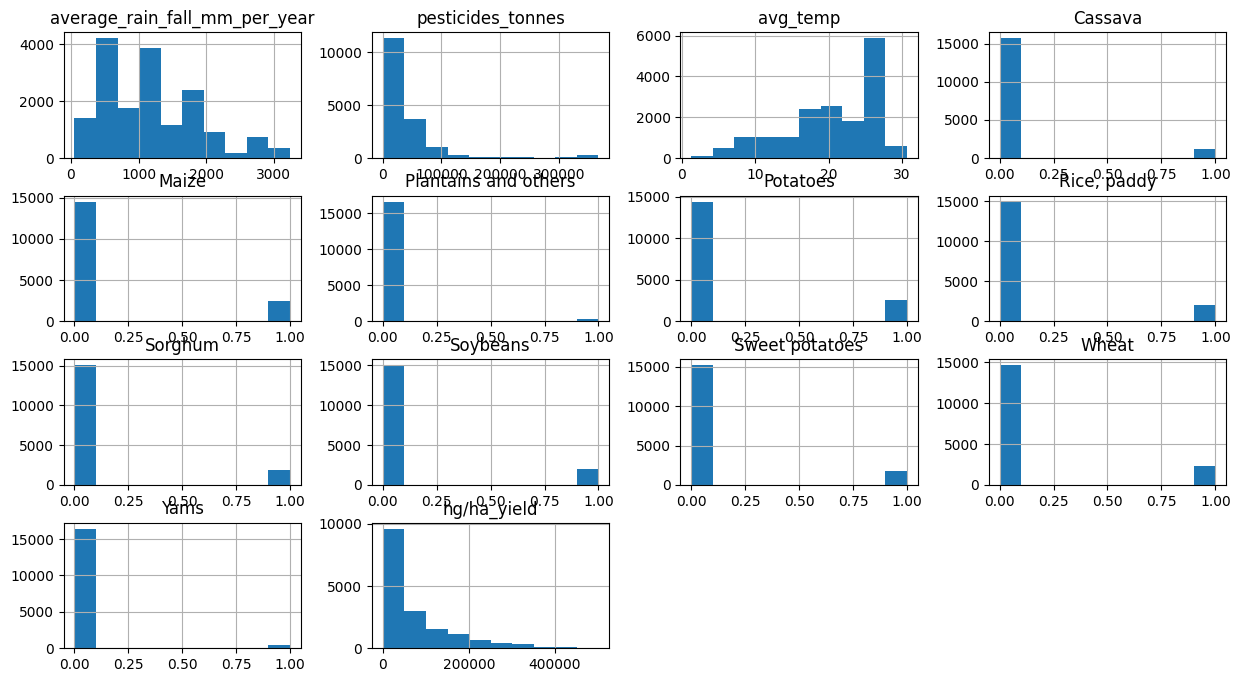

In [9]:
train_data.hist(figsize=(15,8))

In [10]:
train_data.corr()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Cassava,Maize,Plantains and others,Potatoes,"Rice, paddy",Sorghum,Soybeans,Sweet potatoes,Wheat,Yams,hg/ha_yield
average_rain_fall_mm_per_year,1.000000,0.171287,0.314218,0.134066,-0.030679,0.143909,-0.055456,0.014948,-0.069312,-0.018787,0.050227,-0.108367,0.115657,-0.002991
pesticides_tonnes,0.171287,1.000000,0.029640,0.034060,-0.027231,-0.072584,-0.039210,0.002104,-0.008605,0.029819,0.010623,-0.009438,0.105219,0.061370
avg_temp,0.314218,0.029640,1.000000,0.160378,-0.041387,0.081979,-0.111616,0.041030,0.043329,-0.038808,0.094314,-0.153309,0.060672,-0.119234
Cassava,0.134066,0.034060,0.160378,1.000000,-0.114522,-0.041665,-0.118078,-0.102933,-0.098746,-0.100661,-0.094426,-0.110891,-0.048929,0.241198
Maize,-0.030679,-0.027231,-0.041387,-0.114522,1.000000,-0.060853,-0.172457,-0.150338,-0.144221,-0.147018,-0.137912,-0.161960,-0.071462,-0.195733
Plantains and others,0.143909,-0.072584,0.081979,-0.041665,-0.060853,1.000000,-0.062742,-0.054695,-0.052470,-0.053487,-0.050174,-0.058923,-0.025999,0.047289
Potatoes,-0.055456,-0.039210,-0.111616,-0.118078,-0.172457,-0.062742,1.000000,-0.155005,-0.148699,-0.151583,-0.142194,-0.166988,-0.073681,0.612647
"Rice, paddy",0.014948,0.002104,0.041030,-0.102933,-0.150338,-0.054695,-0.155005,1.000000,-0.129627,-0.132141,-0.123956,-0.145570,-0.064230,-0.157550
Sorghum,-0.069312,-0.008605,0.043329,-0.098746,-0.144221,-0.052470,-0.148699,-0.129627,1.000000,-0.126765,-0.118913,-0.139648,-0.061617,-0.242040
Soybeans,-0.018787,0.029819,-0.038808,-0.100661,-0.147018,-0.053487,-0.151583,-0.132141,-0.126765,1.000000,-0.121219,-0.142356,-0.062812,-0.254754


<Axes: >

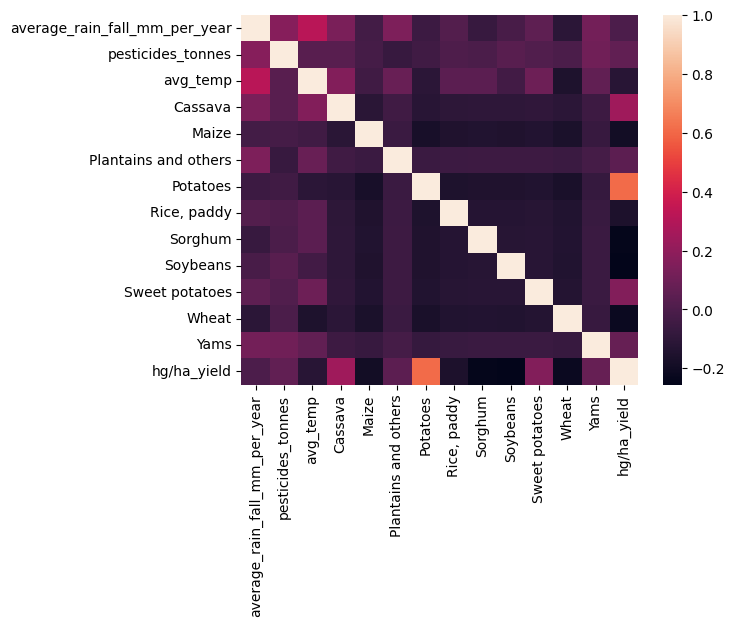

In [11]:
sns.heatmap(train_data.corr())

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
from sklearn.ensemble import RandomForestRegressor

X_train, y_train = train_data.drop(['hg/ha_yield'], axis=1), train_data['hg/ha_yield']
X_train_s = scaler.fit_transform(X_train)

In [40]:
X_val_s = scaler.fit_transform(X_val)

In [76]:
forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [29]:
test_data = X_test.join(y_test)

In [54]:
X_test, y_test = test_data.drop(['hg/ha_yield'], axis=1), test_data['hg/ha_yield']
X_test_s = scaler.fit_transform(X_test)

In [77]:
forest.score(X_test_s, y_test)

0.9032013833495354

In [78]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
forest.score(X_test, y_test)

0.9643181967573317

In [18]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [43]:
len(X_train.columns)

13

In [64]:
model = Sequential()
model.add(InputLayer((13,)))
model.add(Dense(256, 'relu'))
model.add(Dense(128, 'relu'))
model.add(Dense(64, 'relu'))
model.add(Dense(32, 'relu'))
model.add(Dense(16,'relu'))
model.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.10)
model.save('my_model.keras')

model.compile(optimizer = opt,
             loss = 'mse',
             metrics = [RootMeanSquaredError()])

In [65]:
model.fit(x=X_train_s, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3711003904.0000 - root_mean_squared_error: 60300.5312 - val_loss: 439319766482550784.0000 - val_root_mean_squared_error: 662812032.0000
Epoch 2/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2395453184.0000 - root_mean_squared_error: 48893.0195 - val_loss: 1065694292237877248.0000 - val_root_mean_squared_error: 1032324672.0000
Epoch 3/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1754414336.0000 - root_mean_squared_error: 41850.7734 - val_loss: 452688556565987328.0000 - val_root_mean_squared_error: 672821312.0000
Epoch 4/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1581843456.0000 - root_mean_squared_error: 39763.3281 - val_loss: 317696634941079552.0000 - val_root_mean_squared_error: 563645824.0000
Epoch 5/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1470117632.0000 - root_mean_squared_error: 38318.5469 - val_loss: 341322081805271040.0000 - val_root_mean_squared_error: 584227776.0000
Epoch 6/100
5

In [66]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [69]:
from tensorflow.keras.models import load_model

nn = load_model('my_model.keras')

mse(nn.predict(X_train_s), y_train, squared=False), mse(nn.predict(X_val_s), y_val, squared=False)

530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
103/177 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(114648.2379692072, 115225.20535906444)

In [72]:
mae(nn.predict(X_train_s), y_train), mae(nn.predict(X_val_s), y_val)

530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(76896.3351919975, 77492.76012314223)

In [70]:
mse(forest.predict(X_train_s), y_train, squared=False), mse(forest.predict(X_val_s), y_val, squared=False)

/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(5918.668848540026, 24043.136135065564)

In [71]:
mae(forest.predict(X_train_s), y_train), mae(forest.predict(X_val_s), y_val)

(2486.62505235149, 12046.6515851155)